**"AUDIENCE RATING PREDICTION USING ROTTEN TOMATOES MOVIES3 DATASET"**

**IMPORT REQUIRED LIBRARIES**

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for Correlation
from scipy.stats import pearsonr, spearmanr

# Libraries for Pre-processing
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for Model Building
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Libraries for Evaluating the Model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error





**LOAD AND VIEW THE DATASET**

In [ ]:
# Load the dataset
data = pd.read_excel('/content/Rotten_Tomatoes_Movies3.xls')

# Display the first few rows of the dataset
print(data.head())


                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Function to find the correlation and P-value between two continuous values using Pearson correlation

def pearson(feature1: str, feature2: str):

  """Params:
            - Feature1: Continuous variable
            - Feature2: Continuous variable
     Returns:
            - Correlation value
            - P value
    Description:
            - To find the correlation between two continuous variables."""

  corr, p_value = pearsonr(data[feature1], data[feature2])
  print(corr)

  if p_value < 0.05:
    print(f"The p_value is {p_value} which is less than 0.05. So, Reject the Null Hypothesis, there is a significant correlation between {feature1} and {feature2}")
  else:
    print(f"The p_value is {p_value} which is greater that 0.05. So, Failed to reject the Null Hypothesis, there is no significant correlation between {feature1} and {feature2}")



In [ ]:
# Function to find the correlation between two features using Scatter plot visualization

def scatter_plot(x_axis: str, y_axis: str):

  """Params:
            - X axis feature
            - Y axis feature
     Result:
            - The scatter points visualization of two features"""

  visual=plt.scatter(data[x_axis], data[y_axis], c="green")
  plt.xlabel(f'{x_axis}')
  plt.ylabel(f'{y_axis}')

  return visual



In [ ]:
# Function to find the correlation and P-value between ordinal and continuous values using Spearman correlation

def spearman(feature1: str, feature2: str):

  """Params:
            - Feature1:ordinal variable
            - Feature2: Continuous variable
     Returns:
            - Correlation value
            - P value
    Description:
            - To find the correlation between ordinal and continuous variables."""

  corr, p_value = spearmanr(data[feature1], data[feature2])
  print(corr)

  if p_value < 0.05:
    print(f"The p_value is {p_value} which is less than 0.05. So, Reject the Null Hypothesis, there is a significant correlation between {feature1} and {feature2}")
  else:
    print(f"The p_value is {p_value} which is greater that 0.05. So, Failed to reject the Null Hypothesis, there is no significant correlation between {feature1} and {feature2}")



In [ ]:
# Drop the null values in the Audience Rating column - target column

data.dropna(subset=['audience_rating'], inplace=True)

**EDA USING PEARSON FUNCTION BETWEEN CONTINUOUS VALUES**



**Objective**: To test the relationship between the **Tomatometer Count** and the **Audience Rating**.

---

### **Hypotheses**

1. **Null Hypothesis (H₀)**:  
   *There is **no correlation** between the Tomatometer Count and the Audience Rating.*

2. **Alternative Hypothesis (H₁)**:  
   *There is a **correlation** between the Tomatometer Count and the Audience Rating.*


In [ ]:
# Correlation and P-value of Tomatometer count and Audience Rating

pearson('tomatometer_count', 'audience_rating')

0.14101197301996848
The p_value is 1.5413859872893135e-73 which is less than 0.05. So, Reject the Null Hypothesis, there is a significant correlation between tomatometer_count and audience_rating


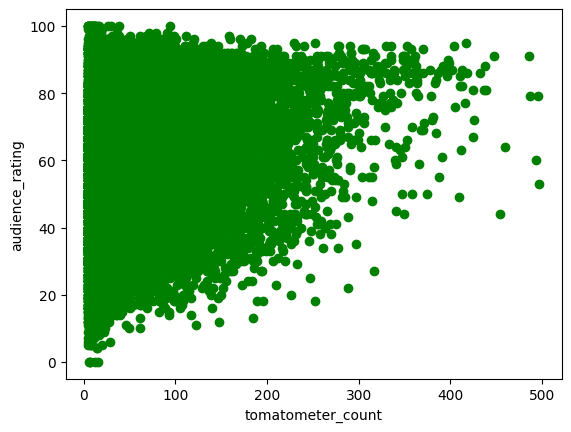

In [ ]:
# Scatter plot of Tomatometer count and Audience Rating

scatter_plot('tomatometer_count', 'audience_rating')

**Insights from scatter plot (Tomatometer count and Audience Rating):**  
- Based on the scatter plot, the audience rating remains **high** even when the Tomatometer count is **low**.  
- As the Tomatometer count increases, only a small number of audience ratings show a noticeable increase.  
- This suggests a **weak correlation** between the Tomatometer count and the audience rating.


**Objective**: To test the relationship between the **Tomatometer rating** and the **Audience Rating**.

---

### **Hypotheses**

1. **Null Hypothesis (H₀)**:  
   *There is **no correlation** between the Tomatometer rating and the Audience Rating.*

2. **Alternative Hypothesis (H₁)**:  
   *There is a **correlation** between the Tomatometer rating and the Audience Rating.*

In [ ]:
# Correlation and P-value of Tomatometer rating and Audience Rating

pearson('tomatometer_rating', 'audience_rating')

0.6601109535533509
The p_value is 0.0 which is less than 0.05. So, Reject the Null Hypothesis, there is a significant correlation between tomatometer_rating and audience_rating


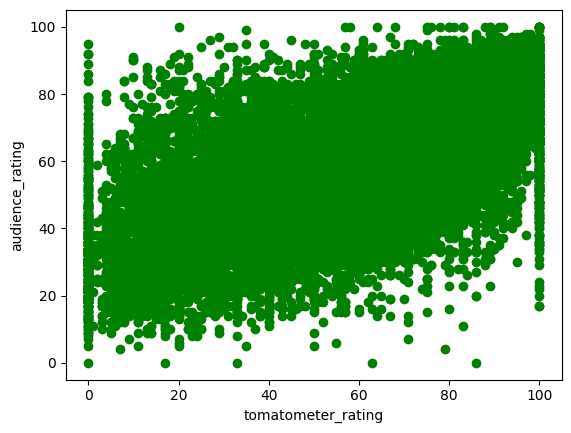

In [ ]:
# Scatter plot of Tomatometer rating and Audience Rating

scatter_plot('tomatometer_rating', 'audience_rating')

**Insight from the Scatter Plot**:

-Based on the scatter plot, the audience rating remains **high** even when the Tomatometer rating is **low**.

-As the Tomatometer rating **increases**, the audience rating shows a **slight upward trend**, but the points are widely scattered.

-This suggests a **weak to moderate correlation** between the Tomatometer rating and the audience rating.


**Objective**: To test the relationship between the **Runtime** and the **Audience Rating**.

---

### **Hypotheses**

1. **Null Hypothesis (H₀)**:  
   *There is **no correlation** between the Runtime and the Audience Rating.*

2. **Alternative Hypothesis (H₁)**:  
   *There is a **correlation** between the Runtime and the Audience Rating.*

In [ ]:
# Drop the null values in the runtime column

data.dropna(subset=['runtime_in_minutes'], inplace=True)

In [ ]:
# Correlation and P-value of Runtime and Audience Rating

pearson('runtime_in_minutes', 'audience_rating')

0.16850667031247893
The p_value is 1.0149340621954882e-103 which is less than 0.05. So, Reject the Null Hypothesis, there is a significant correlation between runtime_in_minutes and audience_rating


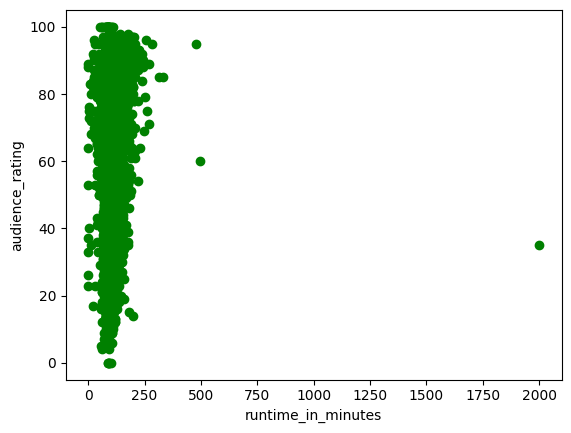

In [ ]:
# Scatter plot of Runtime and Audience Rating

scatter_plot('runtime_in_minutes', 'audience_rating')

**Insight from the Scatter Plot:**

-There appears to be **little to no correlation** between runtime and audience rating, as the points are widely scattered vertically.

-The presence of outliers with extremely high runtimes suggests potential data issues or unusual cases, but they do not strongly influence the overall relationship.

**EDA USING SPEARMAN FUNCTION BETWEEN ORDINAL AND CONTINUOUS VALUES**

**Objective**: To test the relationship between the **Tomatometer status** and the **Audience Rating**.

---

### **Hypotheses**

1. **Null Hypothesis (H₀)**:  
   *There is **no correlation** between the Tomatometer status and the Audience Rating.*

2. **Alternative Hypothesis (H₁)**:  
   *There is a **correlation** between the Tomatometer status and the Audience Rating.*

In [ ]:
# Mapping the categorical Tomatometer status with numerical points

mapping = {'Fresh': 1, 'Rotten': 0, 'Certified Fresh': 2}
data['tomatometer_status_numerical'] = data['tomatometer_status'].map(mapping)
print(data.head())

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

In [ ]:
# Correlation and P-value of Tomatometer status and Audience Rating

spearman('tomatometer_status_numerical', 'audience_rating')

0.6002081265810394
The p_value is 0.0 which is less than 0.05. So, Reject the Null Hypothesis, there is a significant correlation between tomatometer_status_numerical and audience_rating


**Objective**: To test the relationship between the **Rating** and the **Audience Rating**.

---

### **Hypotheses**

1. **Null Hypothesis (H₀)**:  
   *There is **no correlation** between the Rating and the Audience Rating.*

2. **Alternative Hypothesis (H₁)**:  
   *There is a **correlation** between the Rating and the Audience Rating.*

In [ ]:
# Identify the unique values in the rating column

data['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

In [ ]:
# Remove ')' from values in the 'rating' column

data['rating'] = data['rating'].str.replace(')', '', regex=False)

In [ ]:
# Again checking the unique values after removed ')'

data['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

In [ ]:
# Define the mapping for rating categories

rating_mapping = {
    'G': 0,
    'PG': 1,
    'PG-13': 2,
    'R': 3,
    'NC17': 4,
    'NR': 5
}

data['rating_numerical'] = data['rating'].map(rating_mapping)

print(data.head())


                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

In [ ]:
# Correlation and P-value of Rating and Audience Rating

spearman('rating_numerical', 'audience_rating')

0.025191735806609775
The p_value is 0.0013250239635347594 which is less than 0.05. So, Reject the Null Hypothesis, there is a significant correlation between rating_numerical and audience_rating


In [ ]:
# Drop the null values in the text type columns

text_columns = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=text_columns)

In [ ]:
# After removing null values from the main dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7690 entries, 0 to 16634
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   movie_title                   7690 non-null   object        
 1   movie_info                    7690 non-null   object        
 2   critics_consensus             7690 non-null   object        
 3   rating                        7690 non-null   object        
 4   genre                         7690 non-null   object        
 5   directors                     7690 non-null   object        
 6   writers                       7690 non-null   object        
 7   cast                          7690 non-null   object        
 8   in_theaters_date              7610 non-null   datetime64[ns]
 9   on_streaming_date             7690 non-null   datetime64[ns]
 10  runtime_in_minutes            7690 non-null   float64       
 11  studio_name                   7690

In [ ]:
# One-hot encoding for genre column

# Step 1: Split the data values using regex pattern in the genre column
data['genre'] = data['genre'].str.split(',\s*')

# Step 2: Use pd.get_dummies to one-hot encode the genres
genre_dummies = data['genre'].explode().str.get_dummies().groupby(level=0).max()

# Step 3: Join the dummy columns back to the original DataFrame
data = data.join(genre_dummies)


<ipython-input-67-eee6d2bf0ba8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].str.split(',\s*')


In [ ]:
# Check whether the encoded columns are added in the main dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7690 entries, 0 to 16634
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   movie_title                   7690 non-null   object        
 1   movie_info                    7690 non-null   object        
 2   critics_consensus             7690 non-null   object        
 3   rating                        7690 non-null   object        
 4   genre                         7690 non-null   object        
 5   directors                     7690 non-null   object        
 6   writers                       7690 non-null   object        
 7   cast                          7690 non-null   object        
 8   in_theaters_date              7610 non-null   datetime64[ns]
 9   on_streaming_date             7690 non-null   datetime64[ns]
 10  runtime_in_minutes            7690 non-null   float64       
 11  studio_name                   7690

**FEATURE ENGINEERING FOR TEXT COLUMNS**

In [ ]:
# Text columns to be vectorized
text_columns = ['movie_info', 'critics_consensus']

# Numerical columns to include in the model
numerical_columns = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count',
                     'tomatometer_status_numerical', 'rating_numerical', 'Anime & Manga', 'Mystery & Suspense',
                     'Faith & Spirituality', 'Action & Adventure', 'Romance', 'Television', 'Western', 'Kids & Family',
                     'Special Interest', 'Drama', 'Comedy', 'Documentary', 'Art House & International',
                     'Cult Movies', 'Animation', 'Classics', 'Gay & Lesbian', 'Musical & Performing Arts',
                     'Sports & Fitness', 'Horror', 'Science Fiction & Fantasy']


target_column = 'audience_rating'

# Step 1: Separate features and target
X_text = data[text_columns]
X_numerical = data[numerical_columns]
y = data[target_column]

# Step 2: Initialize vectorizers
tfidf_critic = TfidfVectorizer(max_features=100)
tfidf_info = TfidfVectorizer(max_features=100)

# Step 3: Fit and transform the text data
X_critic_tfidf = tfidf_critic.fit_transform(X_text['critics_consensus'])
X_info_tfidf = tfidf_info.fit_transform(X_text['movie_info'])

# Step 4: Combine vectorized text data with numerical data
X_combined = hstack([X_critic_tfidf, X_info_tfidf, X_numerical])



**SPLITTING THE DATA FOR TRAINING AND TESTING**

In [ ]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

**MODEL BUILDING FOR PREDICTING THE AUDIENCE RATING**

In [ ]:
# Linear Regression model

linear_regressor = LinearRegression()
linear_cv_scores = cross_val_score(linear_regressor, X_train, y_train, cv=5, scoring='r2')
print(f"Linear Regression - Mean R²: {linear_cv_scores.mean():.4f}, Std Dev R²: {linear_cv_scores.std():.4f}")

Linear Regression - Mean R²: 0.5523, Std Dev R²: 0.0173


In [ ]:
# Gradient Boosting Regressor model

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
gradient_boosting_cv_scores = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='r2')
print(f"Gradient Boosting Regressor - Mean R²: {gradient_boosting_cv_scores.mean():.4f}, Std Dev R²: {gradient_boosting_cv_scores.std():.4f}")


Gradient Boosting Regressor - Mean R²: 0.5747, Std Dev R²: 0.0162


In [ ]:
# Support Vector Regressor model

svr = SVR(kernel='rbf')
svr_cv_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')
print(f"Support Vector Regressor - Mean R²: {svr_cv_scores.mean():.4f}, Std Dev R²: {svr_cv_scores.std():.4f}")


Support Vector Regressor - Mean R²: 0.5211, Std Dev R²: 0.0188


In [ ]:
# Ridge Regression model

ridge = Ridge(alpha=1.0)
ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
print(f"Ridge Regression - Mean R²: {ridge_cv_scores.mean():.4f}, Std Dev R²: {ridge_cv_scores.std():.4f}")


Ridge Regression - Mean R²: 0.5535, Std Dev R²: 0.0169


In [ ]:
# Lasso Regression model

lasso = Lasso(alpha=0.1)
lasso_cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
print(f"Lasso Regression - Mean R²: {lasso_cv_scores.mean():.4f}, Std Dev R²: {lasso_cv_scores.std():.4f}")


Lasso Regression - Mean R²: 0.5491, Std Dev R²: 0.0184


**MODEL SELECTION**



- After evaluating various models for regression tasks, the **Gradient Boosting Regressor** has demonstrated superior performance compared to others.

- The model achieved a **mean R² score of 0.5747**, with a **standard deviation of 0.0162**, indicating both a strong fit to the data and consistent performance across different folds.

- This performance is notably better than the other models tested, making the Gradient Boosting Regressor the most reliable model for this specific **prediction task**.

- Given its robust performance, this model will be utilized for further predictions.

**MODEL EVALUATION**

In [ ]:
# Predictions on training and test data
y_train_pred = gradient_boosting.predict(X_train)
y_test_pred = gradient_boosting.predict(X_test)

# Training Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test Metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Training Metrics:")
print(f"R-squared: {train_r2}")
print(f"MSE: {train_mse}")
print(f"MAE: {train_mae}")

print("\nTest Metrics:")
print(f"R-squared: {test_r2}")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")

# Overfitting Check
if train_r2 > test_r2 + 0.1:
    print("The model is likely overfitting!")
else:
    print("The model generalizes well!")


Training Metrics:
R-squared: 0.6440939392836593
MSE: 136.54647237110586
MAE: 9.33323533335567

Test Metrics:
R-squared: 0.5881209441970863
MSE: 156.20291131805234
MAE: 9.834974314975927
The model generalizes well!


**SAMPLE PREDICTION USING GRADIENT BOOSTING REGRESSOR MODEL**

In [ ]:
# Sample data to test the model performance and to predict the audience rating

sample_data = {
    'movie_title': ['New Movie'],
    'movie_info': ['A new exciting movie about an adventure in space.'],
    'critics_consensus': ['A visually stunning masterpiece with compelling performances.'],
    'rating': ['PG-13'],
    'genre': ['Science Fiction & Fantasy'],
    'directors': ['John Doe'],
    'writers': ['Jane Smith'],
    'cast': ['Actor 1, Actor 2, Actress 3'],
    'runtime_in_minutes': [130],
    'tomatometer_rating': [90],
    'tomatometer_count': [300],
    'tomatometer_status_numerical': [1],
    'rating_numerical': [4],
    'Anime & Manga': [0],
    'Mystery & Suspense': [0],
    'Faith & Spirituality': [0],
    'Action & Adventure': [1],
    'Romance': [0],
    'Television': [0],
    'Western': [0],
    'Kids & Family': [0],
    'Special Interest': [0],
    'Drama': [0],
    'Comedy': [0],
    'Documentary': [0],
    'Art House & International': [0],
    'Cult Movies': [0],
    'Animation': [1],
    'Classics': [0],
    'Gay & Lesbian': [0],
    'Musical & Performing Arts': [0],
    'Sports & Fitness': [0],
    'Horror': [0],
    'Science Fiction & Fantasy': [1]
}


# Convert the sample data into a DataFrame
sample_df = pd.DataFrame(sample_data)

# Vectorize the text columns using the same TfidfVectorizer used during training
sample_critic_tfidf = tfidf_critic.transform(sample_df['critics_consensus'])
sample_info_tfidf = tfidf_info.transform(sample_df['movie_info'])

# Combine the vectorized text data with numerical data
sample_combined = hstack([sample_critic_tfidf, sample_info_tfidf, sample_df[numerical_columns]])

# Use the trained model to predict audience rating
predicted_rating = gradient_boosting.predict(sample_combined)

print(f"Predicted Audience Rating: {predicted_rating[0]}")


Predicted Audience Rating: 79.29111373658417
